<a href="https://colab.research.google.com/github/MegaVictinixyz/GenAI-GDG-project/blob/main/GenAI_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-2

1. Implement of Basic CNN using Tensorflow for classification task of the given dataset.
2. Clearly show the F1-accuracy and the confusion matrix.

Your may use AI Tools such as **ChatGPT or Claude** for this task.

## For Guide go through these :-

1. [Basic Blog](https://dev.to/abhinowww/building-a-basic-convolutional-neural-network-cnn-in-python-3bab)

2. [Kaggle Notebook with CNN Details](https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide)

3. Please watch DeepLizard's CNN videos !!


## Dataset Description ( Animal Dataset )
1. This dataset contains 15 folders of images of size (224X224X3) . Each folder further has around 150-200 images.
2. Folders represents a class corresponding to the folder name.

In [ ]:
!gdown https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf
!gdown https://drive.google.com/uc?id=15W_13-IFX2lg3L7JEygbnSycyRAJEsUL
!7z x animal_data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf
From (redirected): https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf&confirm=t&uuid=54554bb0-c3bf-45fc-937a-b3db6fa864d5
To: /content/animal_data.zip
100% 38.9M/38.9M [00:00<00:00, 70.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=15W_13-IFX2lg3L7JEygbnSycyRAJEsUL
To: /content/elephant.jpg
100% 132k/132k [00:00<00:00, 107MB/s]

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 38922825 bytes (38 MiB)

Extracting archive: animal_data.zip
--
Path = animal_data.zip
Type = zip
Physical Size = 38922825

  0%     27% 1245 - __MACOSX/animal_data/Bear/._Bear_15_3.jpg                          

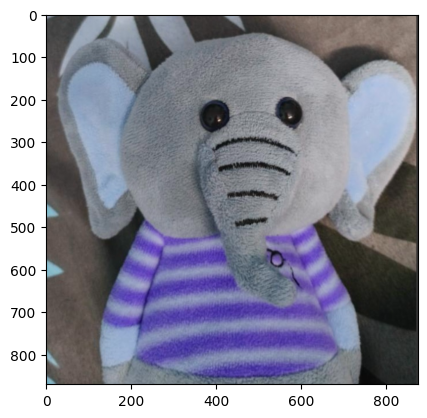

In [ ]:
# Sample of reading a random image
import cv2
import matplotlib.pyplot as plt
temp = cv2.imread("/content/elephant.jpg")
# temp = cv2.resize(temp, (64, 64)) #you may want to resize this image for lesser number of pixels
# no i want to see elephant in full glory no less pixels :(
plt.imshow(temp)

### Make x_train, x_test, y_train, y_test to feed your CNN

In [ ]:
# Beforehand map your classes to numbers such as Bear-0,Bird-1 and so on
import os
animal_list=os.listdir("/content/animal_data")
animal_to_label=dict(zip(animal_list,list(range(len(animal_list)))))
# Hint:use os library iterate throught the folder and read image and append image data and its label to seprate variables
X=[]
Y=[]
for animal in animal_list:
  for image in os.listdir(f"/content/animal_data/{animal}"):
    temp = cv2.imread(f"/content/animal_data/{animal}/{image}")
    X.append(temp)
    Y.append(animal_to_label[animal])
# Use test_train_split library to split your dataset and use random state 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
import numpy as np
X_train=np.array(X_train);X_test=np.array(X_test);y_train=np.array(y_train);y_test=np.array(y_test)

### Make CNN Architecture and Train the model

In [ ]:
# You may use blogs and kaggle notebook attached for this part
# Hint : Use softmax layer as output layer in CNN for probabilities{ needed later :) }
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Dropout
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model.fit(X_train,y_train,epochs=8)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.1289 - loss: 188.8317
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.5635 - loss: 1.7293
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8041 - loss: 0.9349
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9486 - loss: 0.3841
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9748 - loss: 0.2210
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9285 - loss: 0.4145
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9482 - loss: 0.3936
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9777 - loss: 0.2151


### Report Accuracy and Confusion Matrix.


In [ ]:
# You must manually find the Accuracy using for loop over the testing data
# and comparing the results with orignal labels rather than using a library
correct_predictions = 0
prediction_probs = cnn_model.predict(X_test)
predictions = np.argmax(prediction_probs, axis=1)
for i in range(len(X_test)):
    if predictions[i] == y_test[i]:
        correct_predictions += 1
accuracy = correct_predictions / len(X_test)
print("Accuracy:", accuracy)
# You may use library for confusion matrix
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test, predictions)
import pandas as pd
pd.DataFrame(cfm,index=animal_list,columns=animal_list)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
Accuracy: 0.7506426735218509


,Tiger,Giraffe,Panda,Bear,Lion,Bird,Elephant,Dolphin,Deer,Dog,Cat,Cow,Kangaroo,Horse,Zebra
Tiger,19,1,0,0,1,1,0,0,0,1,3,2,0,0,0
Giraffe,1,14,0,1,0,0,0,2,0,0,0,2,0,1,2
Panda,0,2,27,0,2,0,0,0,0,0,0,0,0,0,0
Bear,0,1,1,16,1,0,0,0,0,0,0,4,1,1,0
Lion,1,0,0,0,25,0,0,0,0,1,3,1,0,0,2
Bird,0,0,1,0,0,22,0,1,0,0,0,0,0,1,0
Elephant,1,0,0,0,0,0,17,1,0,0,0,1,0,0,0
Dolphin,0,0,0,0,0,1,0,19,0,0,0,1,0,0,0
Deer,0,0,0,0,0,0,0,0,17,0,0,1,0,0,0
Dog,0,0,4,0,0,0,0,0,0,21,0,0,1,1,0


### Write a program to use a image path and determine its probability of being that animal for each animal

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Tiger: 0.0020
Giraffe: 0.0254
Panda: 0.0051
Bear: 0.0340
Lion: 0.0034
Bird: 0.0388
Elephant: 0.7493
Dolphin: 0.0596
Deer: 0.0080
Dog: 0.0120
Cat: 0.0129
Cow: 0.0124
Kangaroo: 0.0104
Horse: 0.0167
Zebra: 0.0100
True label: Elephant


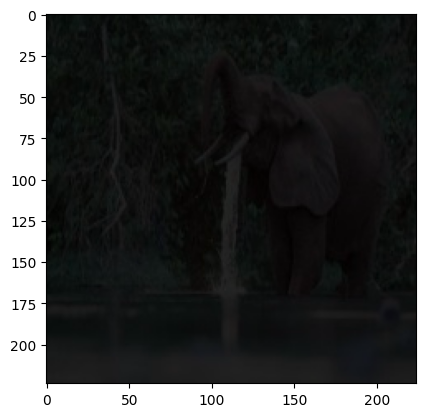

In [ ]:
#  Example Output for some image
# Bird: 0.0023
# Deer: 0.0000
# Giraffe: 0.0000
# Zebra: 0.0000
# Dolphin: 0.0109
# Cow: 0.0004
# Horse: 0.0005
# Dog: 0.9853
# Cat: 0.0000
# Tiger: 0.0000
# Bear: 0.0000
# Lion: 0.0000
# Kangaroo: 0.0005
# Elephant: 0.0000
# Panda: 0.0000

from random import randint
ind = randint(0,len(X_test)-1)      # you can do path but random is more fun ;)
img = X_test[ind]
plt.imshow(img)
img = np.expand_dims(img, axis=0)
prediction_probs = cnn_model.predict(img)

for i, prob in enumerate(prediction_probs[0]):
    print(f"{animal_list[i]}: {prob:.4f}")

print(f"True label: {animal_list[y_test[ind]]}")

# Hint Use softmax layer in CNN for probabilities                  thanks for the hint ;)